In [1]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])  # converting job_posted_date to datetime object
df['job_skills'] = df['job_skills'].apply(lambda data: ast.literal_eval(data) if pd.notna(data) else data)  # converting job_skills to list

# Examples

In [3]:
# Only get data analyst jobs in the United States
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

10108      65000.0
77600      81350.0
289340     61464.0
127433     90000.0
554887     85000.0
470148     72500.0
650246    120710.0
445939     60000.0
25881      60000.0
153266     50000.0
Name: salary_year_avg, dtype: float64

<Axes: >

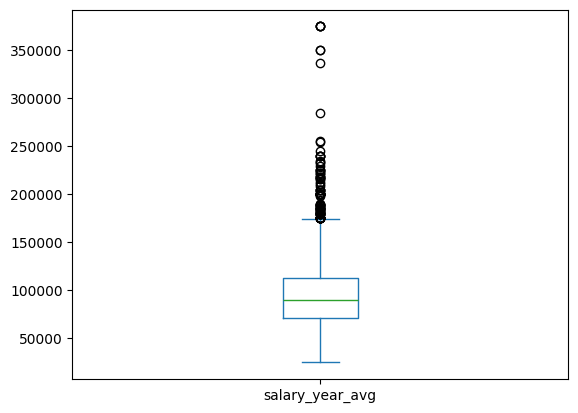

In [4]:
df_DA_US['salary_year_avg'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x725cc7bc7f40>,
 'caps': [<matplotlib.lines.Line2D at 0x725cc7bc5ab0>,
 'boxes': [<matplotlib.lines.Line2D at 0x725cc7bc5c30>],
 'medians': [<matplotlib.lines.Line2D at 0x725cc7bc7250>],
 'fliers': [<matplotlib.lines.Line2D at 0x725cc7bc4190>],
 'means': []}

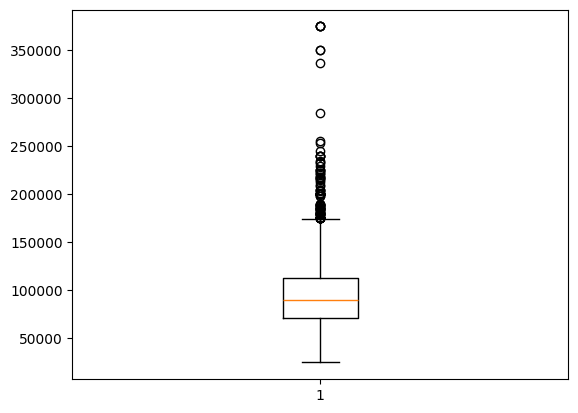

In [5]:
plt.boxplot(df_DA_US['salary_year_avg'])

<Axes: >

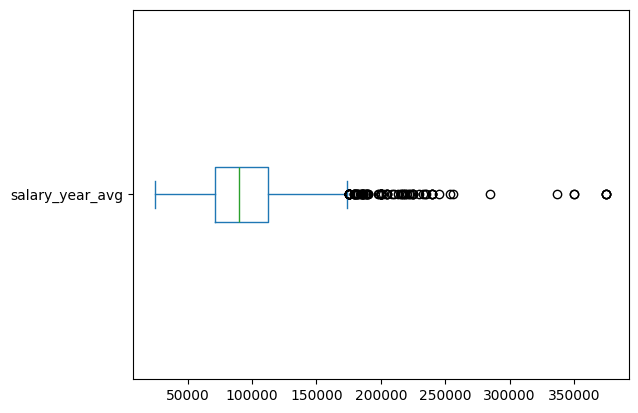

In [6]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

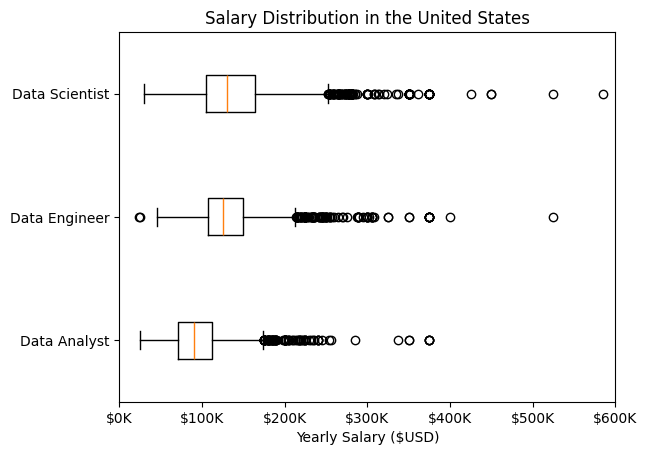

In [16]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist'] 

# Filter the data to appropriate job_titles; Only get data analyst jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg']) 

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

# Exercises